In [27]:
from sklearn.linear_model import ARDRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from Importer import *
import Processor
from numpy.polynomial.polynomial import Polynomial

importlib.reload(Processor)

<module 'Processor' from 'C:\\Users\\venablecrofta\\OneDrive - Virginia Tech\\Documents\\GitHub\\ME_5984-Final-Project\\Processor.py'>

In [28]:
path =  r"train_FD001.csv"
test_path =  r"test_FD001.csv"

index_names  = ['id', 'cycles']
setting_names  = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f"s_{x}" for x in range(1, 22)]
col_names = index_names + setting_names + sensor_names

def apply_names (path, column_names):
    df  = pd.read_csv(path, header=None, delimiter =r"\s+", names = column_names)
#     df = df.set_axis(column_names, axis=1)
    return df
df_train = apply_names(path, col_names)
df_test= apply_names(test_path, col_names)


df_train_RUL = df_train.groupby(['id']).agg({'cycles':'max'})
df_train_RUL.rename(columns={'cycles':'life'},inplace=True)
df_train_RUL.head()
df_train=df_train.merge(df_train_RUL,how='left',on=['id'])

df_train['RUL']=df_train['life']-df_train['cycles']
df_train.drop(['life'],axis=1,inplace=True)
df_train.head()

,id,cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [29]:
df_test_RUL = pd.read_csv('RUL_FD001.csv',header=None, delimiter =r"\s+")
print(df_test_RUL)

      0
0   112
1    98
2    69
3    82
4    91
..  ...
95  137
96   82
97   59
98  117
99   20

[100 rows x 1 columns]


In [94]:
print(df_train.columns)

Index(['id', 'cycles', 'setting_1', 'setting_2', 'setting_3', 's_1', 's_2',
       's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12',
       's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21',
       'RUL'],
      dtype='object')


In [30]:
columns_to_drop = ['setting_1', 'setting_2', 'setting_3', 's_1', 's_5', 's_6', 's_10', 's_16', 's_18', 's_19']
df_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [31]:
scaler = MinMaxScaler()
df_test_cycle = df_test.groupby(['id']).agg({'cycles':'max'})
df_test_cycle.rename(columns={'cycles':'life'},inplace=True)
df_test_max = df_test.merge(df_test_cycle,how='left',on=['id'])
df_test_max = df_test_max[(df_test_max['cycles']==df_test_max['life'])]
# df_test_max['RUL'] = df_test_max['life']-df_test_max['cycles']
df_test_max.drop(['life'],axis=1,inplace=True)

In [130]:
df_test_max.head()

,id,cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
30,1,31,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552
79,2,49,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618
205,3,126,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740
311,4,106,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581
409,5,98,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117


In [32]:
feature_names = [col for col in df_train.columns if col.startswith('s') or col.startswith('sensor')]

X_train = df_train[feature_names]
y_train = df_train.iloc[:,-1]
X_test = df_test_max[feature_names]
y_test = df_test_RUL.iloc[:,-1]


In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
print(np.shape(X_train))
print(np.shape(X_test))

(20631, 14)
(100, 14)


In [34]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=9).fit(X_train,y_train)
y_predictions = model.predict(X_test) # These are the predictions from the test data.

In [62]:
y_pred_train = model.predict(X_train)

# Plot fits per feature
n_features = X_train.shape[1]
fig, axes = plt.subplots(n_features, 1, figsize=(6, 4 * n_features))

if n_features == 1:
    axes = [axes]  

for i, ax in enumerate(axes):
    ax.scatter(X_train[:, i], y_train, label='True', alpha=0.6, color='blue')
    ax.scatter(X_train[:, i], y_pred_train, label='Predicted', alpha=0.6, color='orange')

    # Fit polynomial to predicted data
    degree = 3
    sorted_idx = np.argsort(X_train[:, i])
    x_sorted = X_train[:, i][sorted_idx]
    y_sorted = y_pred_train[sorted_idx]
    
    poly_model = np.poly1d(np.polyfit(x_sorted, y_sorted, deg=degree))
    y_smooth = poly_model(x_sorted)

    ax.plot(x_sorted, y_smooth, color='black', label=f'Poly Fit (deg={degree})')
    
    feature_mse_test = mse(y_test, y_predictions)
    feature_mpe_test = mpe(y_test, y_predictions)
    feature_rmse_test = np.sqrt(feature_mse_test)
    
    ax.set_title(f'Feature {feature_names(i)} vs Target')
    ax.set_xlabel(f'X_train[:, {i}]')
    ax.set_ylabel('y')
    ax.legend()
    
    print(f"MSE: {feature_mse_test}")
    print(f"MPE: {feature_mpe_test}")
    print(f"RMSE: {feature_rmse_test}")
    
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

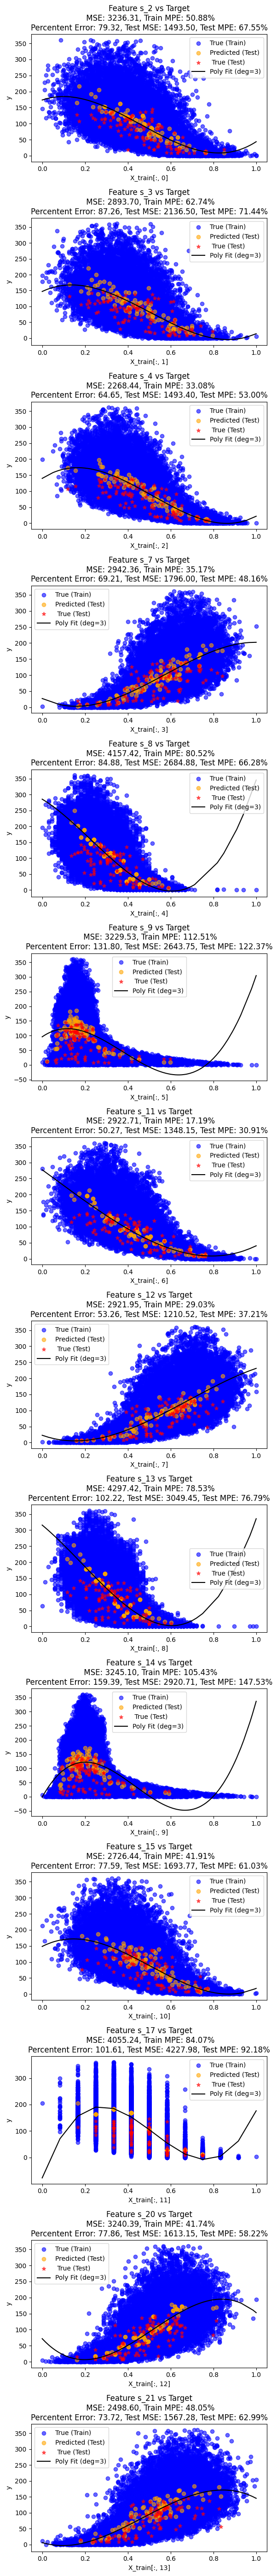

In [70]:
n_features = X_train.shape[1]
fig, axes = plt.subplots(n_features, 1, figsize=(6, 4 * n_features))
feature_names = [col for col in df_train.columns if col.startswith('s') or col.startswith('sensor')]

if n_features == 1:
    axes = [axes]  # Ensure that axes is always an iterable
def mpe(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Avoid division by zero by replacing zeros in y_true with a small value
    non_zero_indices = np.abs(y_true) > 0  # Mask out zero values in y_true
    if np.any(~non_zero_indices):
        print(f"Warning: Zero values detected in y_true for MPE calculation.")
    
    return np.mean(((y_pred[non_zero_indices] - y_true[non_zero_indices]) / np.abs(y_true[non_zero_indices])) * 100)

for i, ax in enumerate(axes):
    # Get predictions for the current feature
    x_train_feature = X_train[:, i].reshape(-1, 1)  # Only use the ith feature
    x_test_feature = X_test[:, i].reshape(-1, 1)    # Only use the ith feature
    
    # Fit the model on the current feature
    model_feature = KNeighborsRegressor(n_neighbors=9)
    model_feature.fit(x_train_feature, y_train)
    
    y_pred_train_feature = model_feature.predict(x_train_feature)
    y_pred_test_feature = model_feature.predict(x_test_feature)
    
    # Plotting the true vs predicted values for the current feature
    ax.scatter(X_train[:, i], y_train, label='True (Train)', alpha=0.6, color='blue')
    ax.scatter(x_test_feature, y_pred_test_feature, label='Predicted (Test)', alpha=0.6, color='orange')
    ax.scatter(x_test_feature, y_test, label =' True (Test)', alpha = 0.6, color = 'red', marker = '*')

    # Fit polynomial to predicted data
    degree = 3
    sorted_idx = np.argsort(X_train[:, i])
    x_sorted = X_train[:, i][sorted_idx]
    y_sorted = y_pred_train_feature[sorted_idx]
    
    poly_model = np.poly1d(np.polyfit(x_sorted, y_sorted, deg=degree))
    y_smooth = poly_model(x_sorted)

    ax.plot(x_sorted, y_smooth, color='black', label=f'Poly Fit (deg={degree})')

    # Calculate error metrics for training data for the current feature
    
    feature_mse_train = mse(y_train, y_pred_train_feature)
    feature_mpe_train = mpe(y_train, y_pred_train_feature)
    feature_rmse_train = np.sqrt(feature_mse_train)
    
    # Calculate error metrics for test data for the current feature
    feature_pe_test = percentage_error(y_test, y_pred_test_feature)
    feature_mse_test = mse(y_test, y_pred_test_feature)
    feature_mpe_test = mpe(y_test, y_pred_test_feature)
    feature_rmse_test = np.sqrt(feature_mse_test)

    # Display error metrics in the title or label
    ax.set_title(f'Feature {feature_names[i]} vs Target\n MSE: {feature_mse_train:.2f}, Train MPE: {feature_mpe_train:.2f}%\n'
                 f'Percentent Error: {feature_pe_test:.2f}, Test MSE: {feature_mse_test:.2f}, Test MPE: {feature_mpe_test:.2f}%')
    ax.set_xlabel(f'X_train[:, {i}]')
    ax.set_ylabel('y')
    ax.legend()

plt.tight_layout()
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer, accuracy_score

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.ensemble import RandomForestRegressor

def relative_error(vector1, vector2):
    vector1 = np.array(vector1)
    return np.mean(np.abs(vector1 - vector2) / np.abs(vector1))

def percentage_error(y_true, y_pred):
    return relative_error(y_true, y_pred) * 100

def mse(vector1, vector2):
    return np.mean((np.array(vector1) - np.array(vector2))**2)

def mpe(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_pred - y_true) / np.abs(y_true)) * 100

# Print accuracy metrics
r2 = r2_score(y_test, y_predictions)
rmse = mean_squared_error(y_test, y_predictions, squared=False)
percent_err = percentage_error(y_test, y_predictions)
mpe_val = mpe(y_test, y_predictions)
mse_val = mse(y_test, y_predictions)
print(f"R² Score                : {r2:.4f}")
print(f" Mean Squared Error: {mse_val:.4f}")
print(f"Percentage Error        : {percent_err:.2f}%")
print(f"Mean Percentage Error   : {mpe_val:.2f}%")

R² Score                : 0.4113
 Mean Squared Error: 1016.5435
Percentage Error        : 38.04%
Mean Percentage Error   : 31.73%


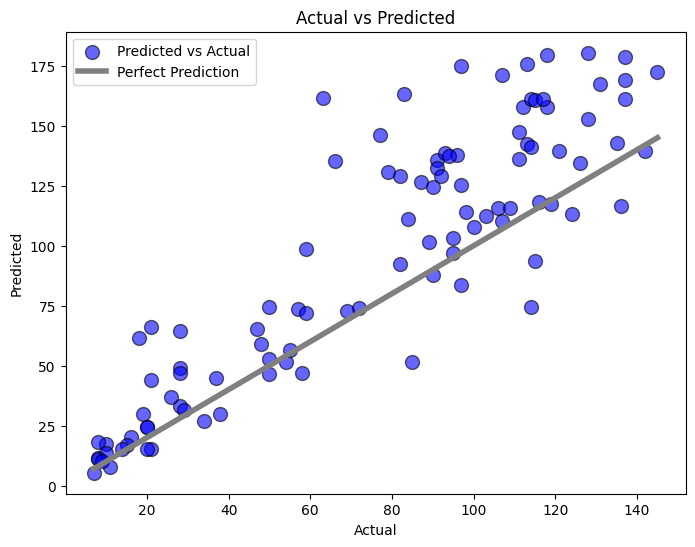

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Scatter plot for actual vs predicted
ax.scatter(y_test, y_predictions, s=100, alpha=0.6, color='blue', edgecolor='black', label='Predicted vs Actual')

# Line representing perfect prediction (45-degree line)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='gray', linewidth=4, label='Perfect Prediction')

# Display the legend
ax.legend()

plt.show()

In [27]:
import math 

# sensor = 's_2'
n_instances = len(y_train)
bins = 10
hist, bin_edges = np.histogram(y_train, bins=bins, density = True)
size = np.sum(hist)

entropy = 0
for count in hist:
    p= count/size
    if p > 0:
        entropy +=-p*math.log2(p)
print(f"Entropy of sin wave is {entropy:.4f} bits")
# KNN regression function with Euclidean and City Block distance
def knn_regression(x_train, y_train, x_query, k, distance_metric='euclidean'):
    y_pred = []
#     x_train = np.array(x_train).reshape(-1, 1)
#     x_query = np.array(x_query).reshape(-1, 1)
    y_train = np.array(y_train)
    for x_q in x_query:
        if distance_metric == 'euclidean':
#             distances = np.sqrt((x_train - x_q) ** 2)  # Euclidean Distance
            distances = np.linalg.norm(x_train - x_q, axis=1)

        elif distance_metric == 'manhattan':
            distances = np.abs(x_train - x_q)  # City Block (Manhattan) Distance
        else:
            raise ValueError("Invalid distance metric. Use 'euclidean' or 'manhattan'.")
        
        # Get indices of k nearest neighbors (smallest distances)
        knn_indices = np.argsort(distances)[:k]
        
        # Average the corresponding y values of nearest neighbors
        y_pred.append(np.mean(y_train[knn_indices]))
    
    return np.array(y_pred)


sensor_names = [col for col in X_train.columns if col.startswith('s') or col.startswith('sensor')]

def calc_regression(X_train, y_train, X_test, y_test, sensor_names, k, plot='no'):
    preds = {}
    for i, sensor in enumerate(sensor_names):
        max_sensor_value = X_train[sensor].quantile(0.99)  # keep lower 99% values
        mask = X_train[sensor] < max_sensor_value

        # Filter and reshape
        x_train_filtered = X_train[sensor][mask].values.reshape(-1, 1)
        y_train_filtered = y_train[mask]

        # Fit scaler to filtered training data
        scaler = StandardScaler()
        x_train_filtered_scaled = scaler.fit_transform(x_train_filtered)

        # Scale test data for that sensor
        x_test_scaled = scaler.transform(X_test[sensor].values.reshape(-1, 1))
        y_pred = knn_regression(
            x_train_filtered_scaled.flatten(),
            y_train_filtered,
            x_test_scaled.flatten(),
            k=k,
            distance_metric='manhattan'
        )
        preds[sensor] = y_pred
        
        sensor_values = x_test_scaled.flatten()
        sorted_indices = np.argsort(sensor_values)
        x_sorted = sensor_values[sorted_indices]
        y_pred_sorted = y_pred[sorted_indices]

        # Smooth with polynomial fit
        degree = 3
        poly_model = np.poly1d(np.polyfit(x_sorted, y_pred_sorted, deg=degree))
        y_smooth = poly_model(x_sorted)

        if plot.lower() == 'yes':
            plt.scatter(x_train_filtered_scaled, y_train_filtered, alpha=0.5, label='Train (scaled)')
            plt.scatter(sensor_values, y_pred, color="blue", label=f"KNN (k={k})")
            plt.plot(x_sorted, y_smooth, color='orange', label=f'Poly Fit (deg={degree})')
            plt.scatter(sensor_values, y_test, color='red', marker='*', label='True RUL')
            plt.xlabel(f"Sensor: {sensor} (scaled)")
            plt.ylabel("RUL")
            plt.legend()
            plt.title(f"KNN Regression - {sensor}")
            plt.show()

            print(f"MSE: {mse(y_test, y_pred):.4f}")
            print(f"MPE: {mpe(y_test, y_pred):.4f}")
            print(f"Percentage Error: {percentage_error(y_test, y_pred):.2f}%")
    return preds
# calc_regression(X_train, y_train, X_test, y_test, sensor_names)    
    
def optimize_k(X_train, y_train, X_test, y_test, sensor_names, k_range):
    best_k = None
    best_error = float('inf')
    errors = []

    for k in k_range:
        preds = calc_regression(X_train, y_train, X_test, y_test, sensor_names, k)
        
        total_error = 0
        for sensor in sensor_names:
            y_pred = preds[sensor]
            error = percentage_error(y_test, y_pred)
            total_error += error

        avg_error = total_error / len(sensor_names)
        errors.append((k, avg_error))

        if avg_error < best_error:
            best_error = avg_error
            best_k = k

        print(f"k={k}: Avg Percentage Error = {avg_error:.2f}%")

    return best_k, best_error, errors

Entropy of sin wave is 2.8324 bits


In [25]:
k_range = range(210, 250, 5)
# target_sensor = 'sensor_2'  # Replace with a valid sensor from your dataset

best_k, best_error, all_errors = optimize_k(X_train, y_train, X_test, y_test, sensor_names, k_range)
# print(f"Best k for {target_sensor}: {best_k} with percentage error: {best_error:.2f}%")

k=210: Avg Percentage Error = 86.38%
k=215: Avg Percentage Error = 86.36%
k=220: Avg Percentage Error = 86.36%
k=225: Avg Percentage Error = 86.28%
k=230: Avg Percentage Error = 86.23%
k=235: Avg Percentage Error = 86.32%
k=240: Avg Percentage Error = 86.36%
k=245: Avg Percentage Error = 86.50%


NameError: name 'target_sensor' is not defined

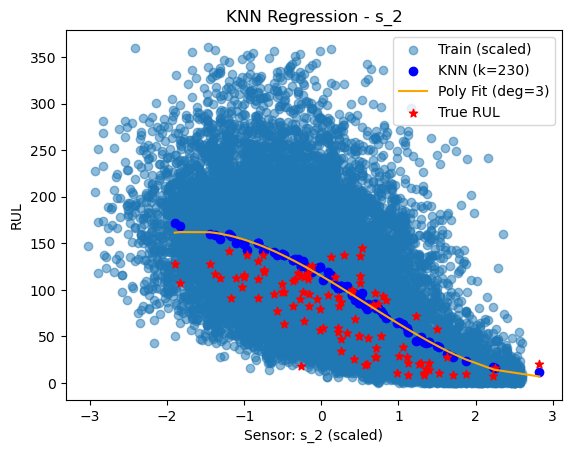

MSE: 1447.0084
MPE: 81.6222
Percentage Error: 88.48%


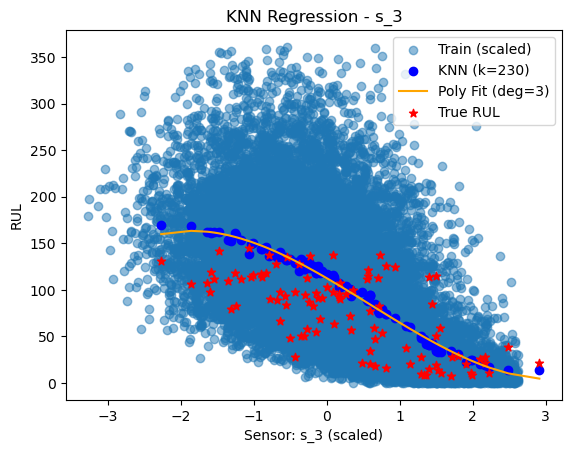

MSE: 1736.1439
MPE: 70.5228
Percentage Error: 84.51%


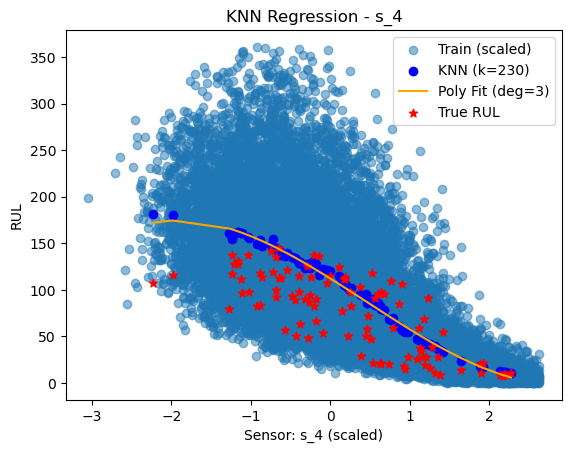

MSE: 1410.9452
MPE: 56.2431
Percentage Error: 64.89%


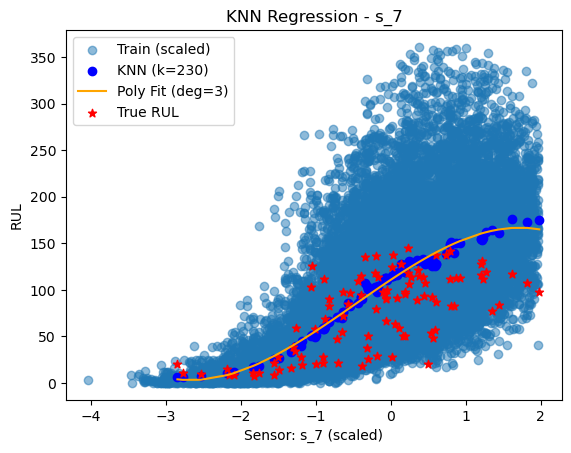

MSE: 1632.7884
MPE: 54.5875
Percentage Error: 67.01%


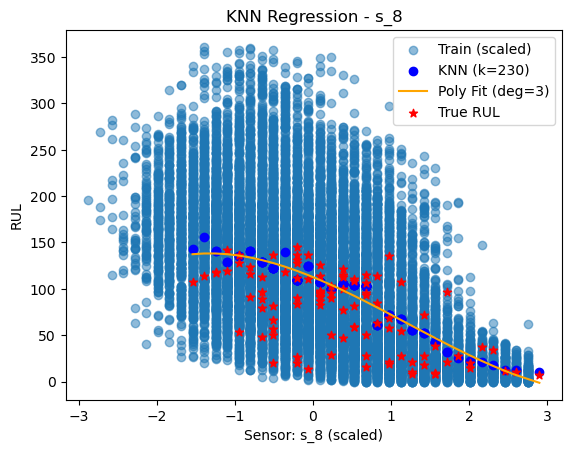

MSE: 1511.5479
MPE: 81.2474
Percentage Error: 92.07%


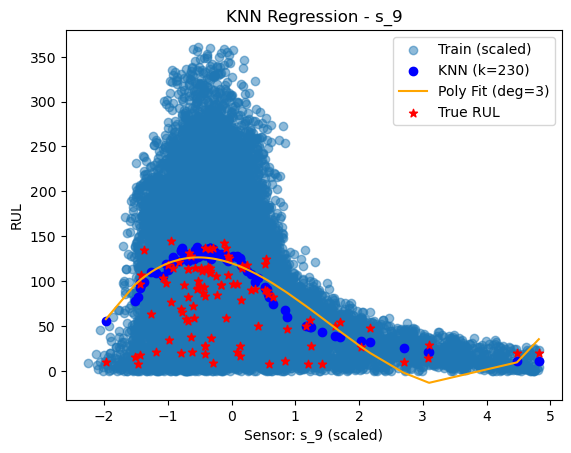

MSE: 2354.2918
MPE: 130.3522
Percentage Error: 138.06%


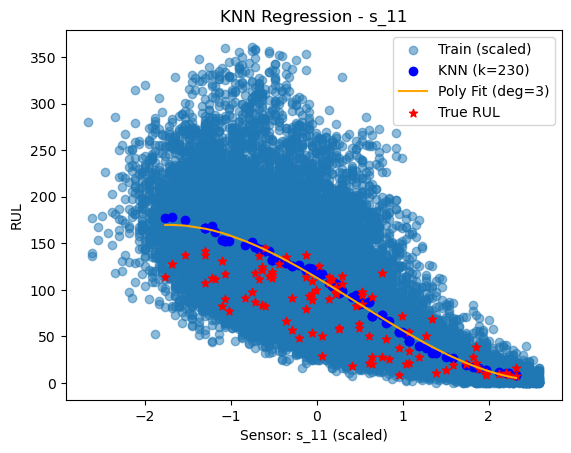

MSE: 1285.6764
MPE: 51.6742
Percentage Error: 60.68%


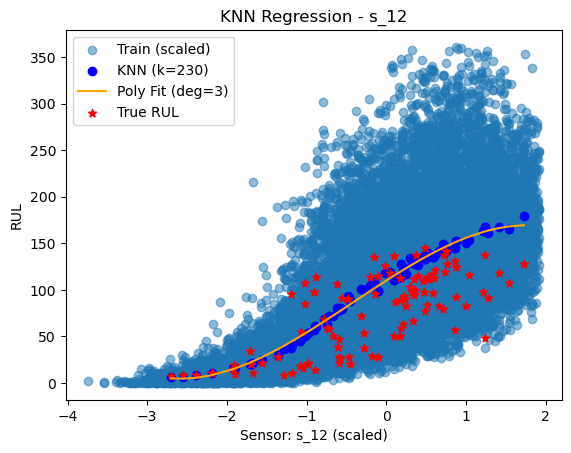

MSE: 1639.0384
MPE: 60.5752
Percentage Error: 70.07%


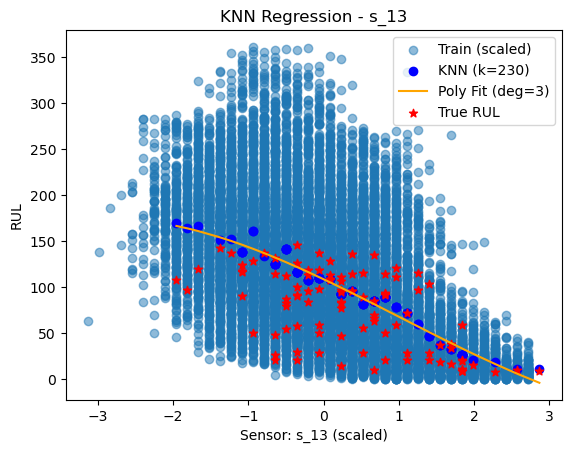

MSE: 1623.8566
MPE: 70.3735
Percentage Error: 81.70%


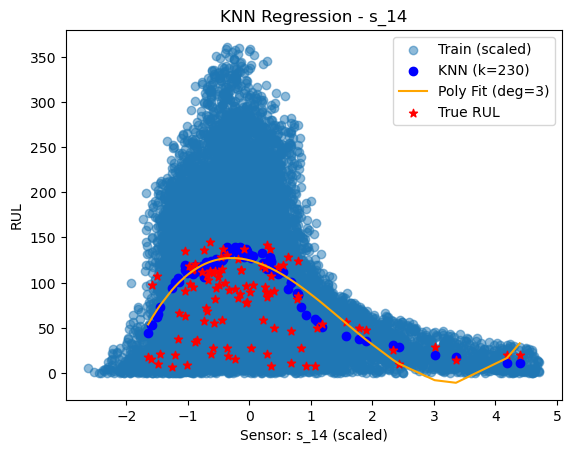

MSE: 2303.8484
MPE: 135.0901
Percentage Error: 144.21%


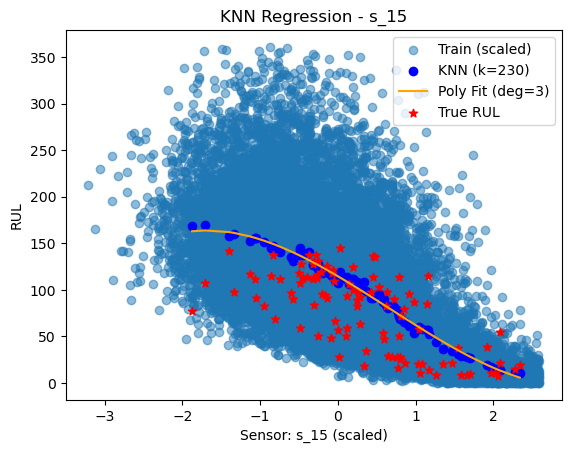

MSE: 1440.5731
MPE: 66.3902
Percentage Error: 79.00%


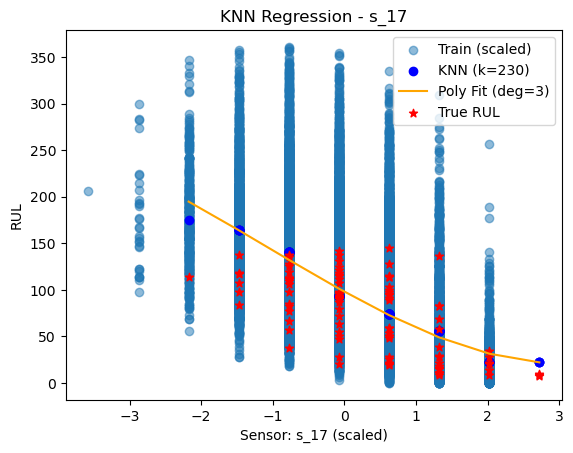

MSE: 1479.0230
MPE: 67.9633
Percentage Error: 83.88%


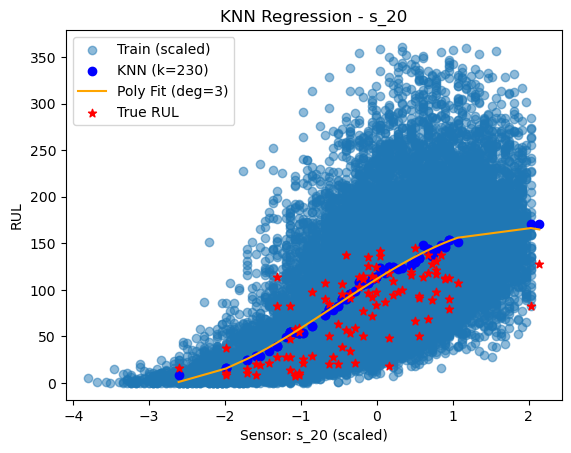

MSE: 1397.9539
MPE: 73.9652
Percentage Error: 84.31%


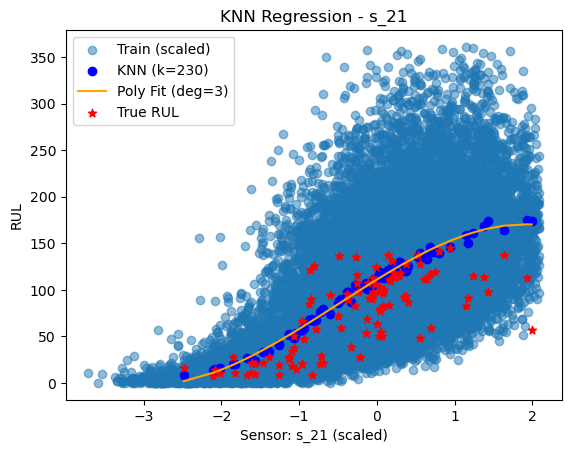

MSE: 1294.3990
MPE: 60.8660
Percentage Error: 68.32%


{'s_2': array([122.0173913 , 130.7       ,  89.45217391, 101.57826087,
        149.65652174,  74.09565217, 157.5173913 , 121.29130435,
        149.65652174,  84.53043478, 138.42173913, 121.29130435,
        140.12173913,  88.42608696, 132.08695652,  83.33478261,
         86.16521739,  84.53043478, 104.1826087 ,  16.21304348,
        124.47391304, 132.86521739, 154.51304348,  46.26086957,
         96.62608696, 142.1826087 , 126.28695652,  94.65217391,
        129.8       , 125.9       ,  43.45217391,  84.29565217,
        138.42173913,  16.67391304,  38.16086957,  82.6826087 ,
         43.93913043,  76.86521739, 159.45652174,  59.19130435,
        125.9       ,  43.45217391, 102.32173913, 132.08695652,
        105.1       , 104.1826087 , 116.18695652, 102.32173913,
         54.06956522, 124.47391304, 126.28695652,  65.47826087,
         96.83478261, 137.32608696, 143.17826087,  42.20434783,
        150.67826087,  79.82608696, 149.6173913 ,  94.65217391,
         48.78695652, 103.8434782

In [28]:
# Plot all sensors with the best_k
calc_regression(X_train, y_train, X_test, y_test, sensor_names, best_k, plot='yes')

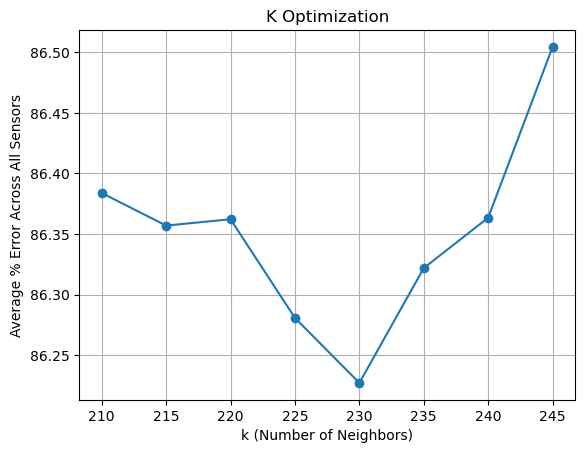

In [29]:
ks = [k for k, err in all_errors]
errs = [err for k, err in all_errors]

plt.plot(ks, errs, marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Average % Error Across All Sensors")
plt.title("K Optimization")
plt.grid(True)
plt.show()